### Dataset link : https://github.com/alfifutuhi13/miniproject1/blob/main/Pandas-Data-Science-Tasks-master.zip

## 1.. What is Feather & how to read data from data !
        Feather is a binary file format that is used for storing data ..


### different binary formats--
    There are plenty of binary formats to store the data on disk, and many of 
    them pandas supports
    Lets talk which one is better in terms of I/O speed, consumed memory 
    and disk space 
    Formats to Compare :
    We’re going to consider the following formats to store our data.

    Plain-text CSV — a good old friend of a data scientist
    MessagePack — it’s like JSON but fast and small
    HDF5 — a file format designed to store and organize large amounts of data
    Feather — a fast, lightweight, and easy-to-use binary file format for 
                storing data frames
    Parquet — an Apache Hadoop’s columnar storage format

        Feather is a fast, lightweight, and easy-to-use binary file format 
        for storing data . It shows high I/O speed, doesn’t take too much memory 
        on the disk and doesn’t need any unpacking when loaded back into RAM.
        
        Feather has max I/O speed

In [ ]:
### In order to work with feather files ,install pyarrow package ..
## !pip install pyarrow


## pandas.to_feather and read_feather are both based on pyarrow,so 
## u have to install pyarrow first using pip or conda
## otherwise u may end up getting ImportErrror..


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''

The data contains hundreds of thousands of electronics store purchases 
broken down by month, product type, cost ,purchase address, etc

'''


In [2]:
all_data = pd.read_feather(r'G:\Data Science projects\EDA_Projects\
                    Sales Analysis\Updated_data/Sales_data.ftr')

In [3]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None


##### Data cleaning and formatting

In [4]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
all_data = all_data.dropna(how='all')
all_data.shape

(186305, 6)

In [ ]:
### do clean Duplicated rows ..

In [ ]:
all_data[all_data.duplicated()]

In [8]:
all_data[all_data.duplicated()].shape

(618, 6)

In [9]:
all_data = all_data.drop_duplicates()

In [10]:
all_data.shape

(185687, 6)

## 2.. Which is the best month for sale ?
    Lets first understand what this term 'best' is all about : 
    if any month has maximum sales, we will consider that as best

In [11]:
'04/19/19 08:46'.split('/')[0]

'04'

In [12]:
def month(x):
    return x.split('/')[0]

##### add month col

In [13]:
all_data['Month'] = all_data['Order Date'].apply(month)

In [16]:
## all_data['Order Date'].apply(lambda x:str(x).split('/')[0])
## all_data['Order Date'].apply(lambda x:x.split('/')[0])

0        04
2        04
3        04
4        04
5        04
         ..
11681    09
11682    09
11683    09
11684    09
11685    09
Name: Order Date, Length: 186305, dtype: object

In [14]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [15]:
all_data['Month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [16]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [17]:
filter1 = all_data['Month']=='Order Date'
len(all_data[~filter1])

185686

In [18]:
all_data = all_data[~filter1]

In [19]:
all_data.shape

(185686, 7)

In [20]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04


In [21]:
all_data['Month'] = all_data['Month'].astype(int)

In [22]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [23]:
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [24]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].\
                                        astype(int)

In [25]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [26]:
all_data.groupby('Month')['sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<AxesSubplot:xlabel='Month'>

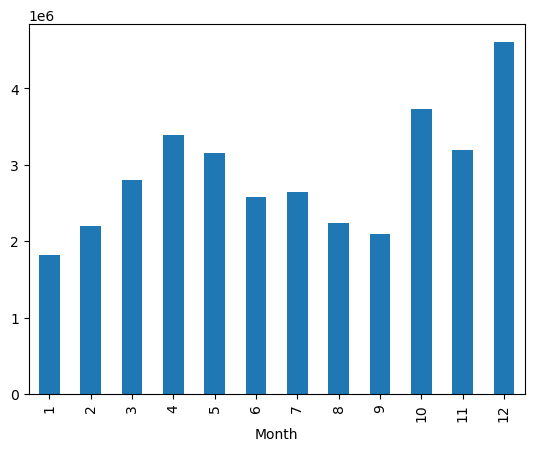

In [27]:
all_data.groupby('Month')['sales'].sum().plot(kind='bar')

'''
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


'''

In [ ]:
'''

->> y-axis scale : it is 1e^6

E stands for exponential , in short it is *10^

So, 1e6 or 1e^6 OR 1 exponent 6 is the same as 
1*10^6 which is same as 1,000,000


'''

## 3.. Which city has max order ? 

In [28]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [29]:
all_data['city'] = all_data['Purchase Address'].\
                    str.split(',').str.get(1)

In [ ]:
'''

def city(x):
    return x.split(',')[1]
    
all_data['city'] = all_data['Purchase Address'].apply(city)

'''

In [30]:
pd.value_counts(all_data['city'])

## all_data['city'].value_counts()

## all_data.groupby('city')['city'].count()
## all_data.groupby('city').agg({'city':'count'})
## all_data.groupby('city').size()

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: city, dtype: int64

<AxesSubplot:ylabel='city'>

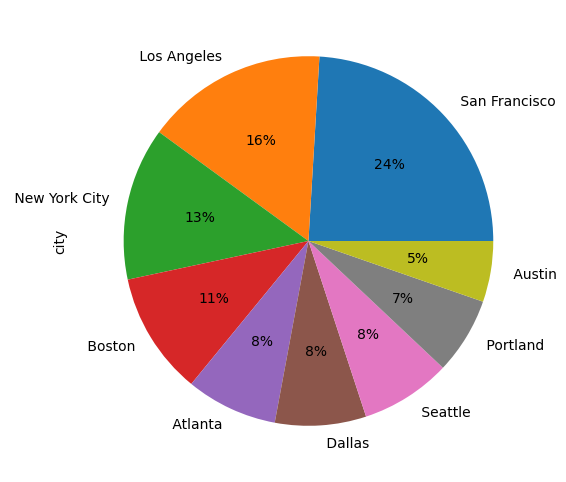

In [31]:
pd.value_counts(all_data['city']).plot(kind='pie' , \
                           figsize=(8,6) , autopct='%1.0f%%' )

###  autopct : Adding percentages to pie chart 

## 4.. What product sold the most &  Why?

In [32]:
all_data.groupby('Product').agg({'Quantity Ordered':'sum' , \
                                 'Price Each':'mean'})

,Quantity Ordered,Price Each
Product,,
20in Monitor,4126,109.99
27in 4K Gaming Monitor,6239,389.99
27in FHD Monitor,7541,149.99
34in Ultrawide Monitor,6192,379.99
AA Batteries (4-pack),27615,3.84
AAA Batteries (4-pack),30986,2.99
Apple Airpods Headphones,15637,150.00
Bose SoundSport Headphones,13430,99.99
Flatscreen TV,4813,300.00


In [33]:
count_df = all_data.groupby('Product').agg(\
                       {'Quantity Ordered':'sum' , \
                        'Price Each':'mean'}).
                        reset_index()

In [34]:
count_df.head(2)

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99


In [ ]:
'''

When we say twin axes, it means a figure can have dual x or y-axes.
plt.twinx() : function which is used to create a twin Axes 
                that are sharing the x-axis..

Similarly, the function twiny() is used to create a second x axis 
            in your figure, which means twiny() sharing the y-axis.





Note : The twinx() and twiny() functions are used when you want 
        multiple plots in a single figure...

    

'''

<ipython-input-67-aae0e2a7fe2a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


Text(0, 0.5, 'Avg_price of product')

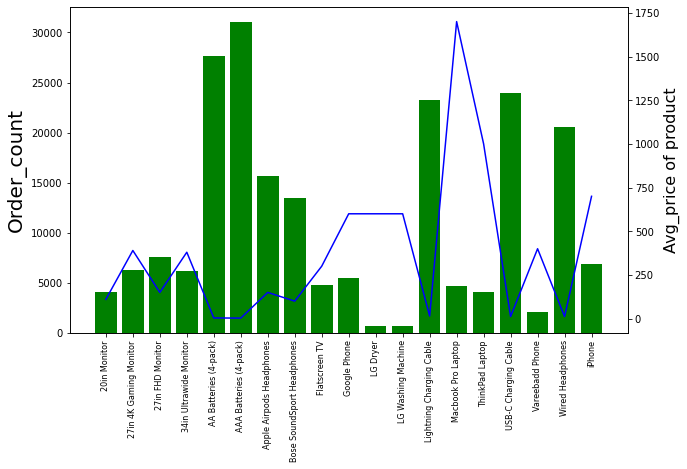

In [67]:
### zoom-in your graph , use figsize=(10,6) inside subplots

fig,ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx() 
## as Products are same for both plots , ie we are sharing x-axis , 
## ie we have to use ax2 = ax1.twinx()

ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color='g')
ax2.plot(count_df['Product'], count_df['Price Each'], 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

ax1.set_ylabel('Order_count' , fontsize = 20)
ax2.set_ylabel('Avg_price of product' , fontsize = 16)

In [ ]:
'''

Insights : 

The top selling product is 'AAA Batteries'. 
The top selling products seems to have a correlation with the 
price of the product. 

The cheaper the product higher the quantity ordered and vice versa.



'''

## 5.. Understanding Trend of the most sold product ? 

In [35]:
all_data['Product'].value_counts()[0:5].index 

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [36]:
most_sold_product = all_data[all_data['Product'].isin(
        ['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 
         'Wired Headphones'])]

#### Ways to create pivot_table :
    using unstack() on top of groupby
    using pd.pivot_Table()
    using pd.crosstab()

In [ ]:
#### Since we have learnt how to create frequency table or 
#### pivot table using crosstab() in zomato case- study , 
##  lets learn how to do it using groupby + unstack()

In [ ]:
##### simplest way of creating pivot tables,

## first of all call groupby on 2 columns so that we will get groups 
## most_sold_product.groupby(['Month' , 'Product']).size() , 
## now "weekday" becomes rows and "hour" becomes cols
## & then call unstack

In [37]:
most_sold_product.groupby(['Month' , 'Product']).size().unstack()

## pd.crosstab(most_sold_product['Month'],most_sold_product['Product'])

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<AxesSubplot:xlabel='Month'>

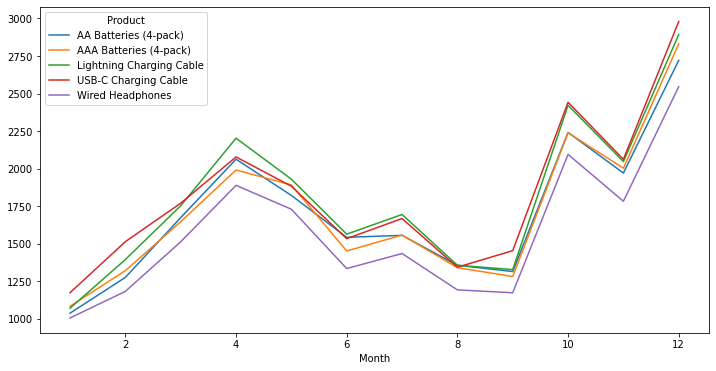

In [133]:
most_sold_product.groupby(['Month' , 'Product']).size().\
                        unstack().plot(figsize=(12,6))

## 6.. What products are most often sold together ?
        keep orders that have same order Id, are sold mostly together ..
        Approach : ie keep duplicated data 

In [38]:
all_data.shape

(185686, 9)

In [39]:
all_data['Order ID'].duplicated(keep=False)

## Where-ever it is True , ie that instance is duplicated 

0         False
2         False
3          True
4          True
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order ID, Length: 185686, dtype: bool

In [40]:
df_duplicated = all_data[all_data['Order ID'].duplicated(keep=False)]

In [41]:
df_duplicated.shape

(14128, 9)

In [42]:
df_duplicated.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles


In [ ]:
'''

keep='first' (default): return duplicates except for the 
                first occurrence.

keep='last': return duplicates except for the last occurrence.

keep=False: return all duplicates.

'''

In [43]:
df_duplicated.groupby('Order ID')['Product'].apply(lambda x: ','.join(x))

## df_duplicated.groupby('Order ID')['Product'].apply(lambda x: ','.join(x))

Order ID
141275              USB-C Charging Cable,Wired Headphones
141290     Apple Airpods Headphones,AA Batteries (4-pack)
141365                   Vareebadd Phone,Wired Headphones
141384                  Google Phone,USB-C Charging Cable
141450            Google Phone,Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop,Wired Headphones
319556                      Google Phone,Wired Headphones
319584                            iPhone,Wired Headphones
319596                    iPhone,Lightning Charging Cable
319631    34in Ultrawide Monitor,Lightning Charging Cable
Name: Product, Length: 6879, dtype: object

In [44]:
dup_products = df_duplicated.groupby('Order ID')['Product']\
                .apply(lambda x: ','.join(x)).reset_index().\
                rename(columns={'Product':'Grouped_products'})

In [45]:
dup_products.head(2)

,Order ID,Grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"


In [46]:
dup_products_df = df_duplicated.merge(dup_products , \
                      how = 'left' , on = 'Order ID')

In [47]:
dup_products_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"


In [49]:
df_duplicated.shape

(14128, 9)

In [50]:
# lets drop out all duplicate Order ID
no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID'])

<AxesSubplot:ylabel='Grouped_products'>

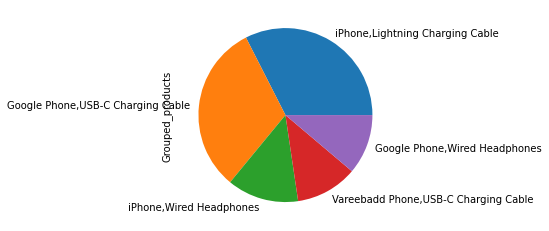

In [96]:
no_dup_df['Grouped_products'].value_counts()[0:5].plot.pie()

In [ ]:
'''
ie as soon as any Person will bought Iphone , we can recommend
him charging cable , wired headphones 
ie as soon as any Person will bought Google phone , we can 
recommend him USB-c charging cable


This is a very important insight if someone is building 
recommendation system ..

'''

In [99]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [97]:
values = no_dup_df['Grouped_products'].value_counts()\
                                        [0:5].values

labels = no_dup_df['Grouped_products'].value_counts()\
                                        [0:5].index

In [100]:
trace = go.Pie(labels = labels, values = values,
               hoverinfo = 'label+percent',textinfo ='value', 
               textfont = dict(size=25),
              pull = [0, 0, 0,0.2, 0]
               )

In [ ]:
## iplot([trace])

In [ ]:
## Performing pairwise analysis to find most sold product !
## Performing pairwise analysis to find which pair has most sale..

## use groupby+unstack+heatmap/pd.pivot_table()/pd.crosstab()
## In which pairs of (year,month) most of the product will get sold ..
## In which pairs of (month, day) most of the product will get sold ..
## In which pairs of ( day, hour) most of the product will get sold ..



## 7.. Performing Pairwise Analysis 
       In which pairs of (month, day) most of the product will get sold ..

In [109]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) ## takes 1 min 

In [111]:
pd.Series._accessors

### various accessors of Series !
### ie 'dt' is one of the accessors :

### datetime is callable as ‘dt’ (as imported)

{'cat', 'dt', 'sparse', 'str'}

In [114]:
all_data['Order Date'].dt.day_name()

0           Friday
2           Sunday
3           Friday
4           Friday
5          Tuesday
            ...   
186845     Tuesday
186846      Sunday
186847      Monday
186848    Thursday
186849      Monday
Name: Order Date, Length: 185950, dtype: object

In [115]:
all_data['year'] = all_data['Order Date'].dt.year
all_data['month'] = all_data['Order Date'].dt.month
all_data['day'] = all_data['Order Date'].dt.day


all_data['hour'] = all_data['Order Date'].dt.hour
all_data['minute'] = all_data['Order Date'].dt.minute
all_data['day_name'] = all_data['Order Date'].dt.day_name()

In [116]:
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,year,month,day,hour,minute,day_name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas,2019,4,19,8,46,Friday


#### Ways to create pivot_table :
    using unstack() on top of groupby
    using pd.pivot_Table()
    using pd.crosstab()

In [ ]:
#### Since we have learnt how to create frequency table 
## or pivot table using crosstab() in zomato case- study , 
## & we have also learnt how to make pivot table using 
## groupby + unstack() in 5th prb st. of this case-study ..
## lets learn how to do it using pd.pivot_table() function !

In [137]:
pd.pivot_table(all_data, index='month', columns='day' , \
               aggfunc='count').T.loc['Month'].T

### make sure 'Month' MUST not have missing value , 
## otherwise u will end up getting wrong values in cell..



## all_data.groupby(['month','day']).apply(lambda x: len(x)).unstack()

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,336.0,324.0,296.0,294.0,308.0,291.0,308.0,284.0,317.0,336.0,...,328.0,277.0,348.0,297.0,369.0,311.0,327.0,320.0,300.0,277.0
2,416.0,433.0,403.0,402.0,387.0,418.0,427.0,434.0,449.0,450.0,...,433.0,391.0,460.0,414.0,440.0,452.0,405.0,NaN,NaN,NaN
3,471.0,525.0,474.0,471.0,503.0,471.0,509.0,481.0,506.0,492.0,...,504.0,547.0,468.0,473.0,459.0,505.0,489.0,492.0,483.0,467.0
4,605.0,588.0,599.0,627.0,611.0,613.0,572.0,610.0,618.0,631.0,...,550.0,589.0,630.0,591.0,578.0,631.0,592.0,590.0,628.0,NaN
5,513.0,533.0,500.0,544.0,528.0,507.0,544.0,546.0,567.0,548.0,...,568.0,541.0,510.0,543.0,511.0,505.0,546.0,549.0,555.0,475.0
6,457.0,450.0,422.0,467.0,465.0,487.0,415.0,446.0,438.0,447.0,...,393.0,413.0,444.0,442.0,463.0,408.0,466.0,491.0,447.0,NaN
7,476.0,467.0,467.0,459.0,452.0,476.0,451.0,478.0,466.0,464.0,...,496.0,422.0,436.0,482.0,476.0,446.0,474.0,418.0,446.0,480.0
8,368.0,389.0,363.0,383.0,363.0,403.0,387.0,382.0,384.0,427.0,...,406.0,374.0,386.0,390.0,390.0,392.0,404.0,400.0,356.0,420.0
9,384.0,401.0,380.0,386.0,358.0,385.0,375.0,381.0,400.0,392.0,...,362.0,381.0,389.0,354.0,386.0,412.0,373.0,412.0,380.0,NaN


In [138]:
pd.pivot_table(all_data, index='month', columns='day' , \
               aggfunc='count').T.loc['Month'].T.style.\
                background_gradient()

## styling dataframe

day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,336.000000,324.000000,296.000000,294.000000,308.000000,291.000000,308.000000,284.000000,317.000000,336.000000,341.000000,294.000000,319.000000,282.000000,328.000000,311.000000,292.000000,320.000000,320.000000,347.000000,307.000000,328.000000,277.000000,348.000000,297.000000,369.000000,311.000000,327.000000,320.000000,300.000000,277.000000
2,416.000000,433.000000,403.000000,402.000000,387.000000,418.000000,427.000000,434.000000,449.000000,450.000000,423.000000,449.000000,470.000000,423.000000,402.000000,438.000000,452.000000,452.000000,405.000000,442.000000,405.000000,433.000000,391.000000,460.000000,414.000000,440.000000,452.000000,405.000000,nan,nan,nan
3,471.000000,525.000000,474.000000,471.000000,503.000000,471.000000,509.000000,481.000000,506.000000,492.000000,524.000000,477.000000,513.000000,478.000000,488.000000,478.000000,478.000000,480.000000,495.000000,481.000000,471.000000,504.000000,547.000000,468.000000,473.000000,459.000000,505.000000,489.000000,492.000000,483.000000,467.000000
4,605.000000,588.000000,599.000000,627.000000,611.000000,613.000000,572.000000,610.000000,618.000000,631.000000,627.000000,623.000000,635.000000,608.000000,585.000000,612.000000,655.000000,660.000000,562.000000,587.000000,672.000000,550.000000,589.000000,630.000000,591.000000,578.000000,631.000000,592.000000,590.000000,628.000000,nan
5,513.000000,533.000000,500.000000,544.000000,528.000000,507.000000,544.000000,546.000000,567.000000,548.000000,504.000000,552.000000,549.000000,587.000000,505.000000,545.000000,555.000000,499.000000,570.000000,552.000000,515.000000,568.000000,541.000000,510.000000,543.000000,511.000000,505.000000,546.000000,549.000000,555.000000,475.000000
6,457.000000,450.000000,422.000000,467.000000,465.000000,487.000000,415.000000,446.000000,438.000000,447.000000,441.000000,463.000000,453.000000,476.000000,479.000000,473.000000,446.000000,443.000000,470.000000,473.000000,476.000000,393.000000,413.000000,444.000000,442.000000,463.000000,408.000000,466.000000,491.000000,447.000000,nan
7,476.000000,467.000000,467.000000,459.000000,452.000000,476.000000,451.000000,478.000000,466.000000,464.000000,429.000000,456.000000,469.000000,453.000000,499.000000,469.000000,405.000000,506.000000,449.000000,461.000000,465.000000,496.000000,422.000000,436.000000,482.000000,476.000000,446.000000,474.000000,418.000000,446.000000,480.000000
8,368.000000,389.000000,363.000000,383.000000,363.000000,403.000000,387.000000,382.000000,384.000000,427.000000,379.000000,361.000000,395.000000,407.000000,391.000000,408.000000,353.000000,366.000000,413.000000,364.000000,357.000000,406.000000,374.000000,386.000000,390.000000,390.000000,392.000000,404.000000,400.000000,356.000000,420.000000
9,384.000000,401.000000,380.000000,386.000000,358.000000,385.000000,375.000000,381.000000,400.000000,392.000000,411.000000,387.000000,393.000000,402.000000,414.000000,374.000000,398.000000,387.000000,405.000000,389.000000,370.000000,362.000000,381.000000,389.000000,354.000000,386.000000,412.000000,373.000000,412.000000,380.000000,nan


In [ ]:
'''

In summer , only April & May sounds good as this could be 
due to Summer Sale where lot of electronic items like 
AC , Cooler etc.. are sold

Then in last months of year like October , November & December  , 
most of the product are sold as lot of discounts  , offers 
runs usualls these days like Christmas sale , new year sale , 
Black friday sale  , some Festival sale ..


'''

In [ ]:
### In which pairs of ( day, hour) 
## most of the product will get sold ..